In [20]:
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import glob
import numpy.ma as ma
from matplotlib import gridspec

In [23]:
# import the MIMOC MLD data

files = glob.glob('../data/mimoc/MIMOC_ML_v2.2_PT_S/*.nc')

mld = np.zeros((341, 720, 12))

for m in range(12):
    mimoc = Dataset(files[m], mode='r')
    mld[:,:,m]= mimoc.variables['DEPTH_MIXED_LAYER'][:]
    lons = mimoc.variables['LONGITUDE'][:]
    lats = mimoc.variables['LATITUDE'][:]

lon, lat = np.meshgrid(lons, lats)

print np.shape(mld)

(341, 720, 12)


In [56]:
# make a timeseries of mean mld over the study region

mld_kuro = np.zeros(12)

x,y = np.where((lon>=140) & (lon<=170) & (lat>=35) & (lat<=45))


for m in range(12):
    tmp = mld[x,y,m]
    mld_kuro[m] = np.nanmean(tmp)

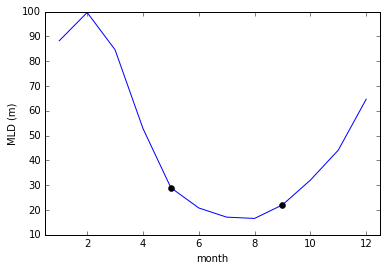

In [62]:
plt.plot(np.arange(1,13,1), mld_kuro)
plt.plot(5, mld_kuro[4],'ko', 9, mld_kuro[8],'ko')
plt.axis([0.5, 12.5, 10, 100])
plt.xlabel('month')
plt.ylabel('MLD (m)')
plt.show()